In [1]:
#Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datasets import load_dataset
import ast

#Loading dataset
ds = load_dataset('lukebarousse/data_jobs')
df = ds['train'].to_pandas()

# Changing job_posted_date to date time format
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

c:\Users\jakey\anaconda3\envs\python_course\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
df_Ds = df[df['job_title_short'] == 'Data Scientist'].copy()
df_Ds

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
9,Data Scientist,Data Scientist II,Anywhere,via ZipRecruiter,Full-time,True,"New York, United States",2023-04-23 13:02:57,False,False,United States,None,NaN,NaN,"Radwell International, LLC","[sql, python, r, mongodb, mongodb, sql server,...","{'analyst_tools': ['excel'], 'cloud': ['azure'..."
17,Data Scientist,Data Science Team Lead,"Laurel, MD",via APL Careers - Johns Hopkins University App...,Full-time,False,Georgia,2023-06-13 13:25:17,False,True,United States,None,NaN,NaN,Johns Hopkins Applied Physics Laboratory,"[go, apl, excel]","{'analyst_tools': ['excel'], 'programming': ['..."
19,Data Scientist,Data Scientist,"Pune, Maharashtra, India",via Indeed,Full-time,False,India,2023-04-26 13:20:12,False,False,India,None,NaN,NaN,Bitwise Solutions,"[r, sql, python, scala, java, c++, hadoop, tab...","{'analyst_tools': ['tableau'], 'libraries': ['..."
20,Data Scientist,Data Scientist,"Zaventem, Belgium",via BeBee Belgique,Full-time,False,Belgium,2023-01-31 13:53:38,False,False,Belgium,None,NaN,NaN,Devoteam,"[r, python, sql, pandas, numpy, scikit-learn, ...","{'libraries': ['pandas', 'numpy', 'scikit-lear..."
21,Data Scientist,Stage - data scientist – génération ia de donn...,"Asnières-sur-Seine, France",via Jobijoba,Full-time,False,France,2023-02-23 13:41:21,False,False,France,None,NaN,NaN,Credit Agricole,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785689,Data Scientist,Data Scientist -50065385,Israel,via LinkedIn,Full-time,False,Israel,2023-01-30 06:36:07,False,False,Israel,None,NaN,NaN,Phoenix Holdings קבוצת הפניקס,[sql],{'programming': ['sql']}
785690,Data Scientist,Customer Master Data Specialist,"Makati, Metro Manila, Philippines",via Trabajo.org,Full-time,False,Philippines,2023-01-18 06:16:42,False,False,Philippines,None,NaN,NaN,Henkel,"[vba, sap, word, powerpoint, excel]","{'analyst_tools': ['sap', 'word', 'powerpoint'..."
785692,Data Scientist,Data Scientist- Hybrid Work Location,"Dayton, OH",via Ai-Jobs.net,Full-time,False,"Illinois, United States",2023-04-21 06:02:31,False,True,United States,year,157500.0,NaN,Tenet3,"[python, matlab, r]","{'programming': ['python', 'matlab', 'r']}"
785697,Data Scientist,Data Science Python modelling,"Pune, Maharashtra, India",via LinkedIn,Full-time,False,India,2023-01-16 06:12:27,False,False,India,None,NaN,NaN,Live Connections,"[python, sql, r, power bi, tableau, word, exce...","{'analyst_tools': ['power bi', 'tableau', 'wor..."


In [9]:
df_Ds['job_posted_month'] = df_Ds['job_posted_date'].dt.month

df_Ds_explode_skills = df_Ds.explode('job_skills')

df_Ds_pivot = df_Ds_explode_skills.pivot_table(
    index = 'job_posted_month',
    columns= 'job_skills',
    aggfunc='size',
    fill_value= 0
)

df_Ds_pivot.loc['Total'] = df_Ds_pivot.sum()
df_Ds_pivot = df_Ds_pivot[df_Ds_pivot.loc['Total'].sort_values(ascending= False).index]
df_Ds_pivot = df_Ds_pivot.drop('Total')
df_Ds_pivot


job_skills,python,sql,r,sas,tableau,aws,spark,azure,tensorflow,excel,...,huggingface,fastify,esquisse,workfront,play framework,wimi,shogun,mattermost,nuxt.js,sqlserver
job_posted_month,,,,,,,,,,,,,,,,,,,,,
1,13998,9811,7566,3842,3446,3253,3222,2582,2316,2132,...,0,0,0,0,0,0,0,0,0,0
2,9551,6600,5064,2644,2566,2089,2085,1716,1525,1453,...,0,0,1,0,0,0,0,0,0,0
3,9210,6374,4971,2480,2456,2092,1992,1727,1405,1440,...,0,0,0,1,0,0,1,0,0,0
4,9135,6270,4873,2444,2447,2055,1905,1665,1546,1456,...,0,2,0,0,0,0,0,0,0,0
5,8029,5583,4228,2244,2271,1921,1716,1442,1271,1202,...,0,0,0,0,0,0,0,0,0,0
6,9338,6473,5019,2282,2432,2173,2072,1739,1580,1324,...,0,1,1,0,0,0,0,0,0,0
7,9400,6678,5029,2300,2547,2207,1972,1845,1535,1425,...,1,0,0,0,0,0,0,0,0,0
8,11193,8026,6089,3100,3013,2571,2466,2130,1972,1795,...,0,0,0,0,1,0,0,0,0,0
9,8393,5748,4153,2224,2062,1923,1820,1704,1462,1352,...,3,0,0,0,0,0,0,0,0,0


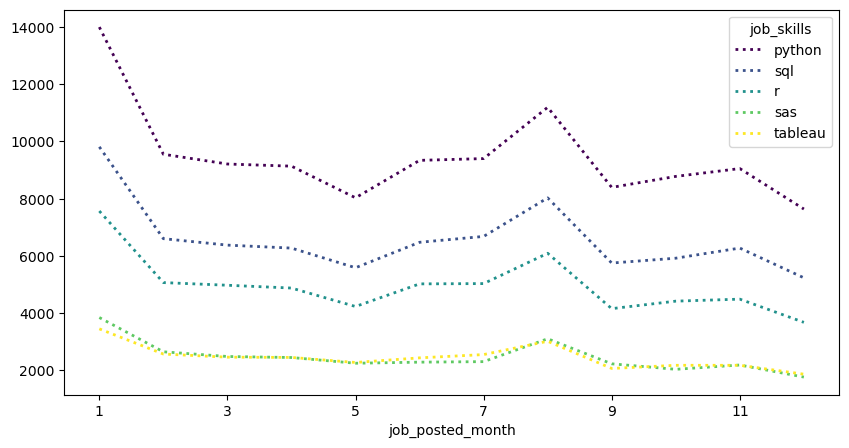

In [10]:
df_Ds_pivot.iloc[:, :5].plot(
    kind = 'line',
    linewidth = 2,
    linestyle = ':', #options '-', '--', '-.',':'
    colormap = 'viridis', #options different colors
    marker = '', #options 'o','x','+','*','s','.','1','2','3'
    markersize = 3,
    figsize=(10,5)
)
plt.show()


In [11]:
df = df[df['job_title_short'] == 'Data Analyst']


In [12]:
# Explode the 'job_skills' into individual rows
df_exploded = df.explode('job_skills')

# Calculate the average salary and count of job postings per skill
skills_stat = df_exploded.groupby('job_skills').agg(
    median_salary = ('salary_year_avg', 'median'),
    skill_count = ('job_skills', 'count')
    
)

# Limit to the top skills
skills_stat = skills_stat.sort_values(by = "skill_count", ascending= False).head(20)

skills_stat

,median_salary,skill_count
job_skills,,
sql,92500.000000,92428
excel,84479.000000,66860
python,98500.000000,57190
tableau,95000.000000,46455
power bi,90000.000000,39380
r,92527.500000,29996
sas,90000.000000,27998
powerpoint,85000.000000,13822
word,80000.000000,13562


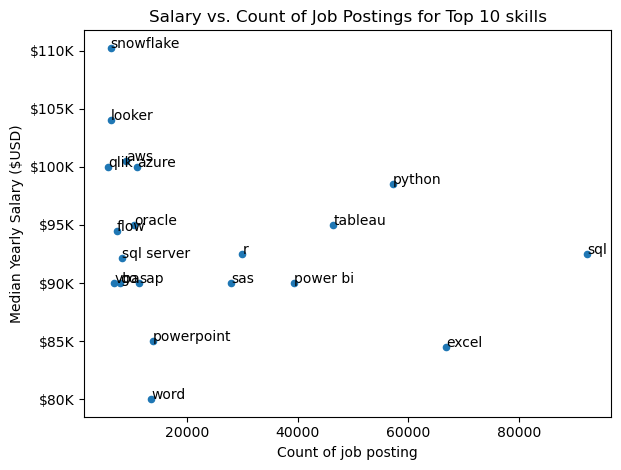

In [13]:
# fig, ax = plt.subplots()


skills_stat.plot(kind = 'scatter', x = 'skill_count', y = 'median_salary')
plt.xlabel('Count of job posting')
plt.ylabel('Median Yearly Salary ($USD)')
plt.title('Salary vs. Count of Job Postings for Top 10 skills')
plt.tight_layout()

for i , skill_name in enumerate(skills_stat.index):
    plt.text(skills_stat['skill_count'].iloc[i], skills_stat['median_salary'].iloc[i], skill_name)

ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K'))


    
plt.show()

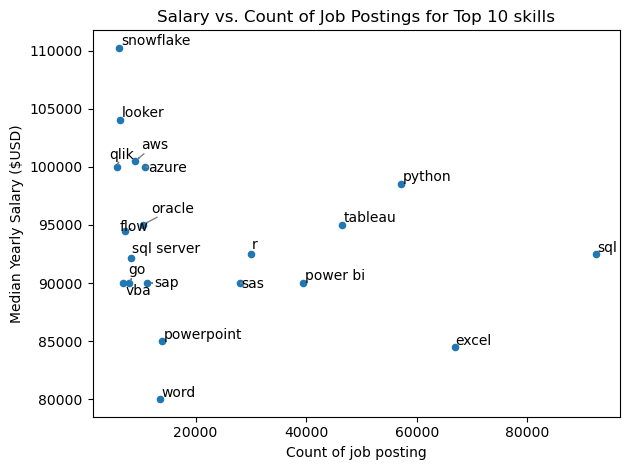

In [14]:
from adjustText import adjust_text



skills_stat.plot(kind = 'scatter', x = 'skill_count', y = 'median_salary')
plt.xlabel('Count of job posting')
plt.ylabel('Median Yearly Salary ($USD)')
plt.title('Salary vs. Count of Job Postings for Top 10 skills')
plt.tight_layout()

texts = []
for i , skill_name in enumerate(skills_stat.index):
    texts.append(plt.text(skills_stat['skill_count'].iloc[i], skills_stat['median_salary'].iloc[i], skill_name))

adjust_text(texts, arrowprops = dict(arrowstyle ="->") , color='gray',lw = 1 )




    
plt.show()